### Problem 1a
Plotting signal

Sound characteristics

40 millisecond subset

Fundamental frequency $f_0$ of the vowel /iy/.

Sample rate is 16000


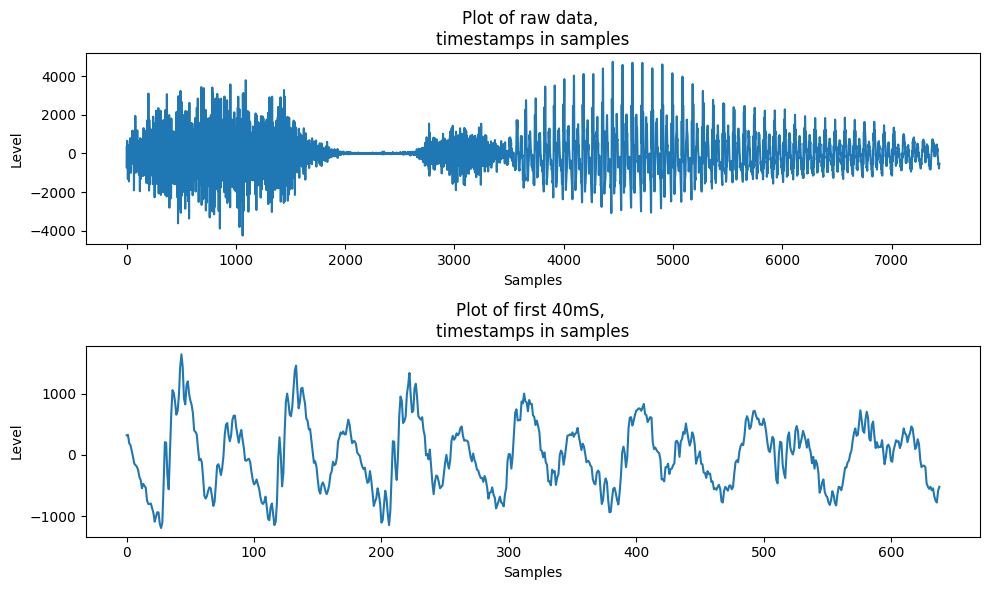

In [2]:
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np
import pysptk as psp
import scipy

Fs, data = scipy.io.wavfile.read('stry.wav')
print(f"Sample rate is {Fs}")

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(data)
plt.title("Plot of raw data, \ntimestamps in samples")
plt.xlabel("Samples")
plt.ylabel("Level")

plt.subplot(2, 1, 2)
plt.plot(data[-640: -1])
plt.title("Plot of first 40mS, \ntimestamps in samples")
plt.xlabel("Samples")
plt.ylabel("Level")

plt.tight_layout()






# Old code

# fig, axs = plt.subplots(1, 2)

# axs[0].plot(data)
# axs[0].set_title("Plot of raw data, \ntimestamps in samples")
# axs[0].set_xlabel("Samples")
# axs[0].set_ylabel("Level")

# axs[1].plot(data[-640: -1])
# axs[1].set_title("Plot of first 40mS, \ntimestamps in samples")
# axs[1].set_xlabel("Samples")
# axs[1].set_ylabel("Level")


Fundamental frequency of the vowel is found by dividing the number of peaks seen by the number of seconds over which they span: $\frac{7 peaks}{40mS} = 175 Hz$

### Problem 1b


C:\Users\danie\AppData\Local\Temp\ipykernel_6468\2063489757.py:16: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  hammingWindow = scipy.signal.hamming(hammingWindowLength)


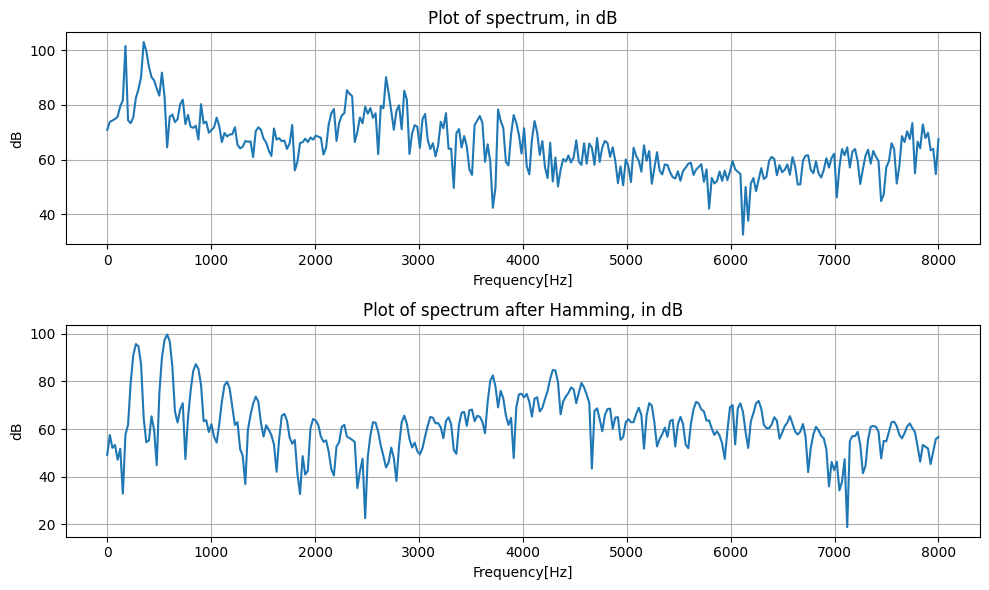

In [3]:
# Spectrum in dB
# spectrum = scipy.fft.fft(data[-640: -1], n = 1024)
spectrum = scipy.fft.fft(data[-641: -1])
# spectrum = scipy.fft.fftshift(spectrum)
spectrum_dB = 20*np.log10(abs(spectrum))


# Axis for plotting
# x_axis = (np.arange(1024)*Fs/1024) # Sent by Phoebe; creates a list of numbers that are 1024 increments of Fs.
x_axis = np.linspace(0, (Fs/2), int(len(data[-641: -1])/2))
# plt.plot(x_axis[0:512], spectrumdB[0:512])


# Hamming window
hammingWindowLength = len(data[-641: -1])
hammingWindow = scipy.signal.hamming(hammingWindowLength)
windowedSignal = data[-641: -1] * hammingWindow
# spectrumHamming = scipy.fft.fft(data[-640: -1], n = 1024)
spectrumHamming = scipy.fft.fft(windowedSignal, n = 1024)
# spectrumHamming = scipy.fft.fftshift(spectrumHamming) # Why does this flip the spectrum horizontally? It was supposed to get rid of horizontal line.
spectrumHamming_dB = 20*np.log10(abs(spectrumHamming))


# Freq
timestep = 1/Fs
freq = scipy.fft.fftfreq(n = 512, d = timestep)
# freq = scipy.fft.fftfreq(n = len(data), d = timestep)
# freq = scipy.fft.fftfreq(n = 512, d = timestep)
freq = scipy.fft.fftshift(freq)
# print(freq)
# print(len(freq))
# print(f"Frequency list is {freq}")
# print(f"""Index of max value in spectrum is {np.argmax(spectrum)}, which means that the corresponding
      # frequency value is {freq[np.argmax(spectrum)]}""")


# Plotting both signals

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
# plt.plot(x_axis[0:512], spectrum_dB[0:512])
plt.plot(x_axis, spectrum_dB[:int(len(data[-641: -1])/2)])
plt.title("Plot of spectrum, in dB")
plt.xlabel("Frequency[Hz]")
plt.ylabel("dB")
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(x_axis, spectrumHamming_dB[:int(len(data[-641: -1])/2)])
plt.title("Plot of spectrum after Hamming, in dB")
plt.xlabel("Frequency[Hz]")
plt.ylabel("dB")
plt.grid()

plt.tight_layout()









### Problem 1c

In [4]:
# for order in (4, 8, 16, 50):
#     arCoefficient = psp.sptk.lpc(windowedSignal, order = order)
#     w, h = scipy.signal.freqz(b = arCoefficient, a = np.concatenate((np.array([1])), arCoefficient[1:]), fs = Fs)



### Problem 1d

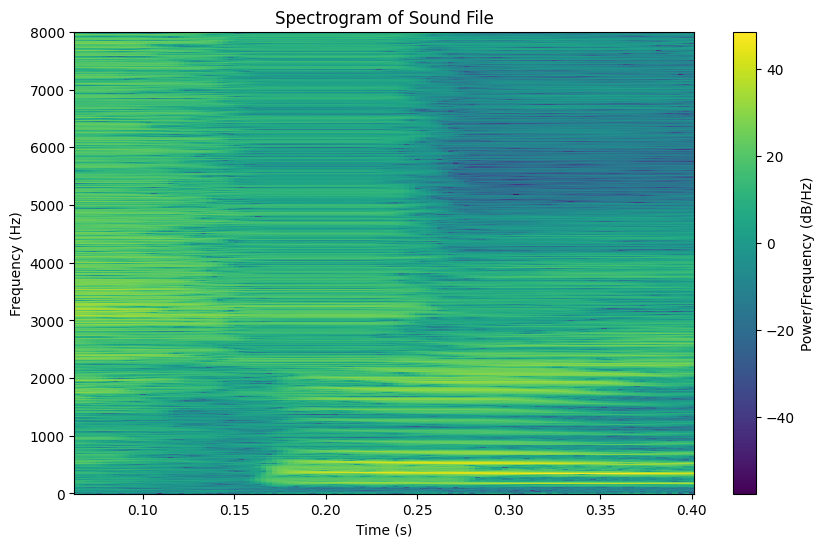

In [5]:
# Create a spectrogram
frequencies, times, Sxx = scipy.signal.spectrogram(data, fs = Fs, nperseg=2048, noverlap=2000)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx))
plt.title('Spectrogram of Sound File')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.show()

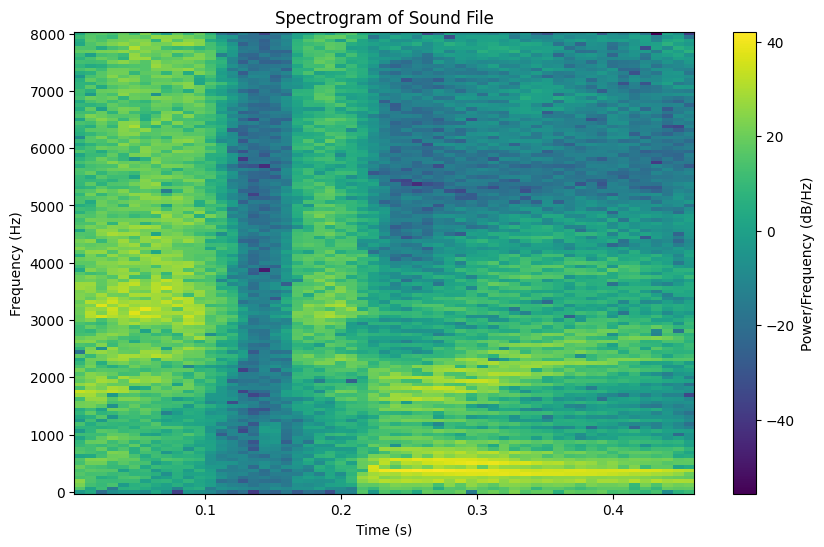

In [19]:
# Create a spectrogram
frequencies, times, Sxx = scipy.signal.spectrogram(data, fs = Fs, nperseg = 256, noverlap = 128)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx))
plt.title('Spectrogram of Sound File')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.show()

### Problem 2a

C:\Users\danie\AppData\Local\Temp\ipykernel_6468\1871963867.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  fundamental_frequency = Fs / periodSamples


f_0 = inf


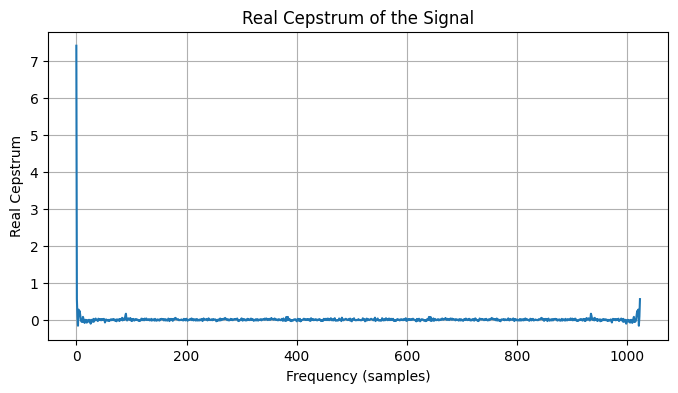

In [7]:
# Computing and plotting cepstrum
# abs_log_spectrum = np.log(np.abs(spectrum))
# cepstrum = scipy.fft.ifft(abs_log_spectrum)
# plt.plot(cepstrum)

spectrum = np.abs(np.fft.fft(data[-641: -1], n = 1024))
log_spectrum = np.log(spectrum)
cepstrum = np.fft.ifft(log_spectrum)
# plt.plot(cepstrum)

periodSamples = np.argmax(cepstrum)
fundamental_frequency = Fs / periodSamples
print(f"f_0 = {fundamental_frequency}")

plt.figure(figsize = (8, 4))
plt.plot(np.real(cepstrum))
plt.xlabel('Frequency (samples)')
plt.ylabel('Real Cepstrum')
plt.title('Real Cepstrum of the Signal')
plt.grid(True)
plt.show()

### Problem 2b

In [8]:
# Finding the peak
peaks, _ = scipy.signal.find_peaks(cepstrum, height = 0.07)  # Adjust the 'height' parameter as needed
print(peaks)
# The first two formant frequencies occur at 

[   4    6   12   90  381  384  640  643  934 1012 1018 1020]


c:\Users\danie\anaconda3\envs\ttt4185\Lib\site-packages\scipy\signal\_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


### Problem 2c

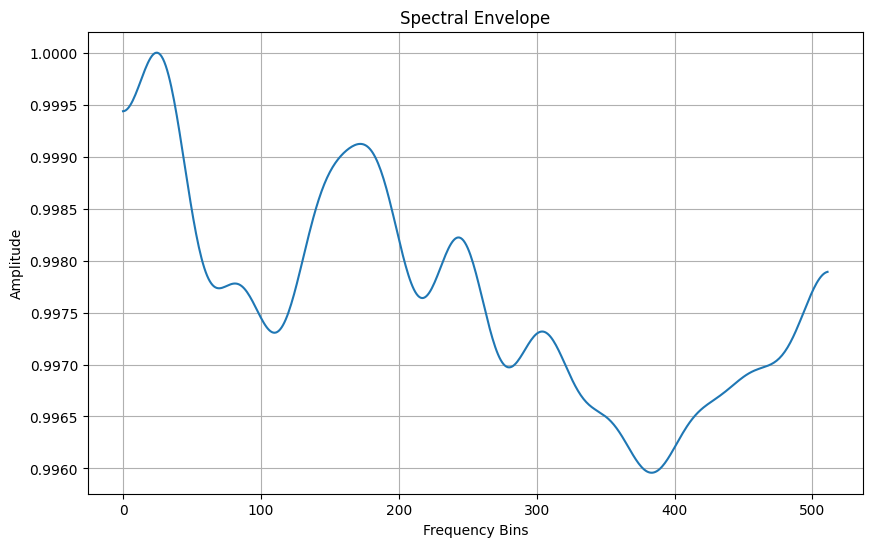

In [17]:
# Convert cepstral peaks back to the spectral envelope
# spectral_envelope = np.exp(np.fft.irfft(cepstrum, n = len(cepstrum)))

# Fewer cepstrum values, for a simpler spectral envelope
# cepstrumTwo = cepstrum[-81:-1] + cepstrum[0:80]
# cepstrumTwo = cepstrum
# cepstrumTwo[n_cepstr:-n_cepstr] = 0
# spectral_envelope = np.exp(np.fft.irfft(cepstrum, n = len(cepstrumTwo)))

# Phoebe code simpler specenv
n_cepstr = 20
truncated_cepstr = np.copy(cepstrum)
truncated_cepstr[n_cepstr:-n_cepstr] = 0
spectral_envelope = np.exp(np.fft.irfft(truncated_cepstr, n = len(truncated_cepstr)))


# Normalize the spectral envelope
spectral_envelope /= np.max(spectral_envelope)

# Plot the spectral envelope
plt.figure(figsize = (10, 6))
plt.plot(spectral_envelope[:len(spectral_envelope) // 2])  # Plot only the positive frequencies
plt.title('Spectral Envelope')
plt.xlabel('Frequency Bins')
plt.ylabel('Amplitude')
plt.grid()
plt.show()